<a href="https://colab.research.google.com/github/Nidhi-y21/IPL-Score-Prediction-using-Deep-Learning/blob/master/IPL_Score_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: First, let's import all the necessary libraries:


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


Step 2: Loading the dataset!


In [ ]:
ipl=pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


from matplotlib import pyplot as plt
_df_0['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['overs'].plot(kind='hist', bins=20, title='overs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['runs_last_5'].plot(kind='hist', bins=20, title='runs_last_5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('batsman').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='runs', y='overs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='overs', y='runs_last_5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mid']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mid'}, axis=1)
              .sort_values('mid', ascending=True))
  xs = counted['mid']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('mid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mid')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['runs']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'runs'}, axis=1)
              .sort_values('runs', ascending=True))
  xs = counted['runs']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('runs', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runs')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['wickets']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'wickets'}, axis=1)
              .sort_values('wickets', ascending=True))
  xs = counted['wickets']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('wickets', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('batsman')):
  _plot_series(series, series_name, i)
  fig.legend(title='batsman', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('wickets')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['runs'].plot(kind='line', figsize=(8, 4), title='runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['overs'].plot(kind='line', figsize=(8, 4), title='overs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['runs_last_5'].plot(kind='line', figsize=(8, 4), title='runs_last_5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='runs', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='overs', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['batsman'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='runs_last_5', y='batsman', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Step 3: Data Pre-processing


In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [ ]:
#Further Pre-Processing
X = df.drop(['total'], axis =1)
y = df['total']


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Define the Neural Network


In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


Step 5: Model Training


In [ ]:
model.fit(X_train_scaled,y_train,epochs=50, batch_size=64, validation_data=(X_test_scaled,y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 55.9560 - val_loss: 22.2524
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4638 - val_loss: 22.0309
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2107 - val_loss: 21.9438
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2421 - val_loss: 21.9162
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1812 - val_loss: 21.9230
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 22.1101 - val_loss: 22.0858
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.3206 - val_loss: 21.9679
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0950 - val_loss: 22.1700
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2011 - val_loss: 21.9973
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0606 - val_loss: 21.9196
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0417 - val_loss: 21.7472
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

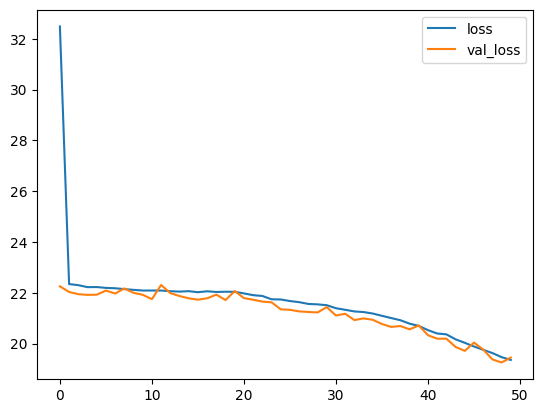

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


Step 6: Model Evaluation


In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


19.94123827886801

Step 7: Let's create an Interactive Widget


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()